# Product analysis for games market 

Using historical data on sales of computer games, users and experts ratings, genres and platforms, identify patterns that determine the success of a game for future advertising campaigns


# Analysis steps
1. Data exploration
2. Data preprocessing
3. Data analysis
4. Determination a portrait of the user
5. Hypothesis testing
6. Conclusions

# Data  review

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import seaborn as sns

In [2]:
games_df = pd.read_csv('C:/Users/r.gayfullin/Documents/YP/project_5_games/games.csv')

In [3]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Name - the name of the game
- Platform - gaming platform
- Year_of_Release - game release year
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board)


In [4]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The dataset has gaps in several columns.
- The gaps in the game name and genre, which are likely to be characteristic of the same observations.
- The gaps in the values of user ratings and critics. If ratings were downloaded from an external Internet resource, then the pass may be due to the fact that the unrated game was released a long time ago and is not present on the site, or the game is unpopular and there are not enough ratings for it.
-  The gaps in the values of the rating of the game. This is most likely due to the fact that the game was released before the implementation of the current rating system (the ESRB rating system was developed in 1994). It is also worth considering that the ESRB rating is not mandatory and the game publisher could simply not register their product in this rating system.
- The gaps in the release date of the game.

In [5]:
# gaps in years
games_df[games_df['Year_of_Release'].isnull()==True].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


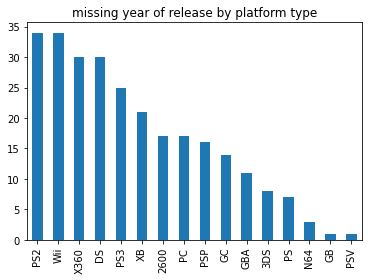

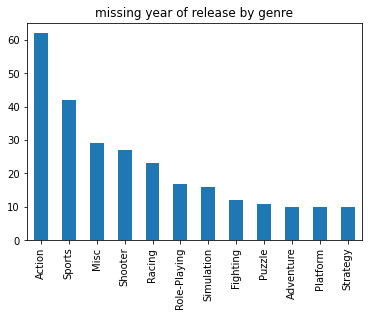

In [6]:
# distribution of values
games_df[games_df['Year_of_Release'].isnull()==True]['Platform'].value_counts().plot(kind='bar', title='missing year of release by platform type');
plt.show()
games_df[games_df['Year_of_Release'].isnull()==True]['Genre'].value_counts().plot(kind='bar', title='missing year of release by genre');

Gaps in year of release are typical for most of the presented platforms and for different game genres. To fill in the gaps, it is need to look for duplicates in the names of games (many games are released on several platforms
at the same time, and it is possible to fill in the gaps by analogy).

In [7]:
# Checking game names for duplicates
games_df.Name.value_counts().head(10)

Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
FIFA 14                          9
Madden NFL 07                    9
LEGO The Hobbit                  8
FIFA Soccer 13                   8
Terraria                         8
LEGO Harry Potter: Years 5-7     8
Monopoly                         8
Name: Name, dtype: int64

In [8]:
len(games_df.Name) - games_df.Name.value_counts().count()

5156

Of the 16.7 thousand game titles, 5156 are duplicated. This can be caused by two factors:
1. Uploading error, in which case duplicates got into the table (we need to drop such values)
2. The game was released on several platforms at

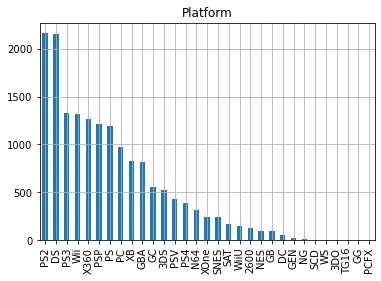

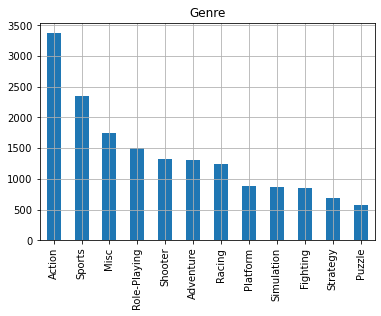

In [9]:
#distribution of observations by year, platform and genre
for i in games_df[['Platform', 'Genre']]:
    games_df[i].value_counts().plot(kind='bar', title=i,grid=True)
    plt.show()

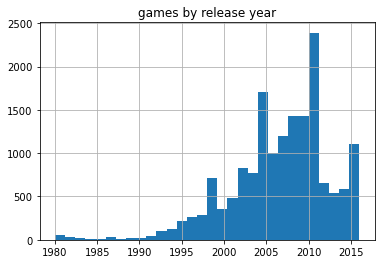

In [10]:
games_df['Year_of_Release'].hist(bins=30)
plt.title('games by release year');

## Short conclusions:
- There are random and non-random gaps in the data
- about 30% of game titles are duplicated. some of them 9 or more times
- Dataset contains the most games of the Action genre, most of the games are presented for the PS2 and Nintendo DS platforms, most of the games are from 2011.
- The games of 1980-1995 are the least represented.
- Incorrect data type in user rating and year columns.

# Data preprocessing


In [11]:
#converting columns to lowercase
games_df.columns = games_df.columns.str.lower()

checking gaps in game titles and genre. There are only 2 such rows.

In [12]:
games_df[games_df['name'].isnull()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
games_df = games_df.dropna(subset=['name','genre'])

In [14]:
#number of gaps in years of release
games_df['year_of_release'].isna().sum()

269

In [15]:
games_df = games_df.dropna(subset=['year_of_release'])

The gaps in the ESRB rating can be filled in by analogy:  
The rating does not depend on which platform the game is published on, so
1. a separate dataframe will be created, in which games are grouped by name and rating values are determined
2. The dataframe will be merged with the original table by game name. So, for duplicated games in which at least for one
platform knows the rating, all gaps in the rating will be filled

In [16]:
# create a dataframe with all known ratings
new_rating = games_df[games_df['rating'].isnull() != True].groupby('name')['rating'].first()
new_rating = pd.DataFrame(new_rating)
new_rating.reset_index(inplace=True)

In [17]:
games_df = games_df.merge(new_rating, on='name', how='left')

In [18]:
games_df['rating_x'].isnull().sum() - games_df['rating_y'].isnull().sum()

417

With this method, we managed to get drop 437 gaps in the ranking.
Let's bring the table back to its original form. Delete the "rating_x" column and rename the "rating_y" column back to "rating"

In [19]:
games_df.rename(columns={'rating_y':'rating'}, inplace=True)
games_df.drop(columns=['rating_x'], inplace=True)

The rest of the gaps may not be random. As mentioned above, the ESRB is a voluntary rating system, which means that it is up to the publisher to rate their game. Let's say that gaps - are games that do not have a rating. Then we can replace the gaps with "no rating"

In [20]:
games_df['rating'] = games_df['rating'].fillna('no rating')

fixing gaps in user and expert scores:
You cannot apply the previous methods to fill gaps in user ratings and expert ratings. Ratings may differ for different platforms, since for different platforms the quality of graphics, the level of optimization of the game, ease of control, the presence of bugs and other indicators vary, then user and expert ratings cannot be filled in by analogy for all platforms. The best solution would be not to fill in such gaps.

In [21]:
games_df['user_score'].value_counts().head()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

More than 2000 games have a user rating indicated by the abbreviation tbd. This abbreviation means "To Be
Determined" - values that are currently undefined. This is probably depends on  the rating calculating system. On many sites, the aggregate rating is set only when the number of users who voted exceeds some predetermined threshold. many websites give an aggregate rating only when the number of users who voted exceeds some predetermined threshold. It is possibe to concider, that that 'tbd' is also a missing value, and it would be better to cast it to the Nan type

In [22]:
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

In [23]:
# создаем столбец с суммарными показателями продаж
games_df['total_sales'] = games_df['eu_sales'] + games_df['na_sales'] + games_df['jp_sales']

In [24]:
#number of full duplicates
games_df.duplicated().sum()

0

In [25]:
#number of duplicates by name, release date, and platform columns
games_df[games_df[['name','platform','year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15969,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [26]:
games_df[(games_df['name'] == 'Madden NFL 13') &(games_df['platform'] == 'PS3') ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.33
15969,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


One duplicate was found in the dataset, which is associated with an upload error. Duplicate row contains no information and must be deleted

In [27]:
games_df = games_df.drop(index=15969)

# Exploratory data analysis
- Determining the number of games by year. Determination of the priority time period for analysis
- Defining sales metrics by platform. Identify platforms with the highest total sales. Determining how long does it take for new platforms to appear and old ones to disappear.
- Define a slice of data to build a forecast for 2017.
- Identify platforms that are top sellers. Select a few potentially profitable platforms.
- Evaluating the impact of user ratings and experts on sales
- Determination of the most profitable genres. Identification of genres with high and low sales


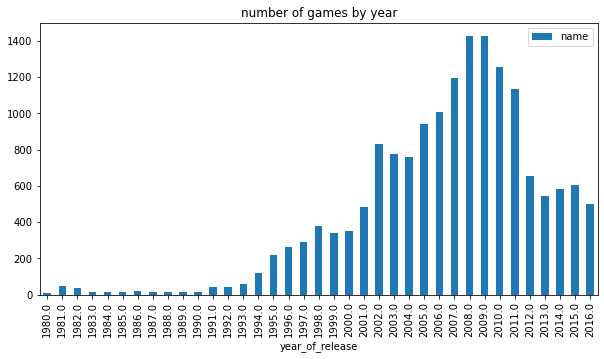

In [28]:
games_df.pivot_table(index='year_of_release', values='name',aggfunc='count').plot(kind='bar', figsize= (10,5))
plt.title('number of games by year');

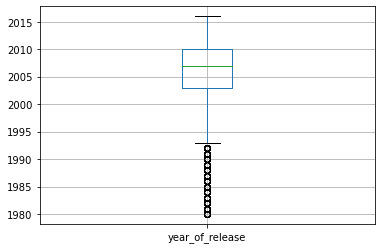

In [29]:
games_df.boxplot(column='year_of_release');

The graph and boxplot show that the mass production of games began in 1994. Indeed, the massive development of the industry
prihorditsya just for the period of the mid-90s. This is due to several factors:  

1. Popularization and reduction in the cost of personal computers and personal game consoles since the mid-90s.
2. Distribution of more technologically advanced carriers. The industry has moved from cartridges to higher-capacity CDs.
3. The development of computer technologies in general, including 3D modeling, which made the game production process more efficient, the product began to turn out better, and demand increased accordingly.

<b>Defining sales metrics by platform. Identify platforms with the highest total sales. Determining how long does it take for new platforms to appear and old ones to disappear.

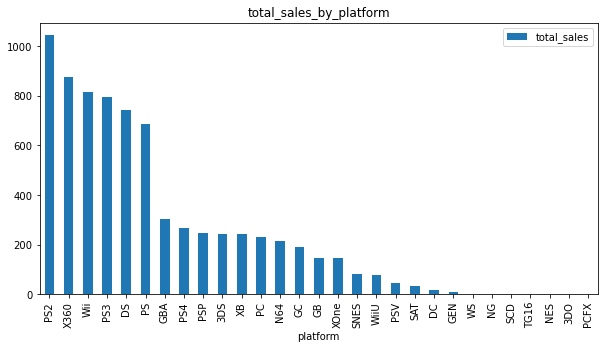

In [30]:
games_df[games_df['year_of_release'] > 1993].pivot_table(index='platform', values='total_sales', aggfunc='sum'
                                                        ).sort_values(by='total_sales', ascending=False
                                                                     ).plot(kind='bar', figsize= (10,5));
plt.title('total_sales_by_platform');

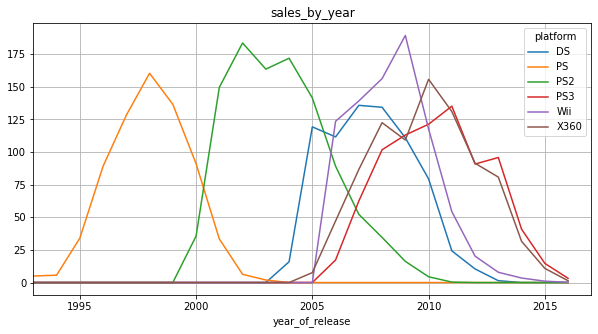

In [31]:
#the graph shows a strong gap in sales between the first 6 platforms and the rest. Let's make a cut on these platforms
selected_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

games_platform_slice = games_df.query('platform in @selected_platforms')
(games_platform_slice
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
.fillna(0)
.plot(figsize=(10,5), grid=True, xlim=(1993,2017)))
plt.title('sales_by_year');

The diagram shows that the life cycle of a gaming platform is 10-11 years, and the peak of sales falls on 4-6 years after the release of the platform. it can be assumed that for platforms released in 2006-2007, sales in 2017 will be minimal.  


The highest profits will be from sales of games released for platforms in 2012-2013. This is due to the fact that console manufacturers on average release a new product every 7 years, and for several more years, manufacturers continue to release games for older platforms until the majority of users switch to new devices.
Eg. PS2 - 2000, PS3 - 2007, PS4 - 2013, PS5 - 2020


Therefore, the current period for further analysis will be analyzed starting from 2014.

<b>Define a slice of data to build a forecast for 2017.
Identify platforms that are top sellers. Select a few potentially profitable platforms.

In [32]:
actual_games_df = games_df.query('year_of_release >= 2014')

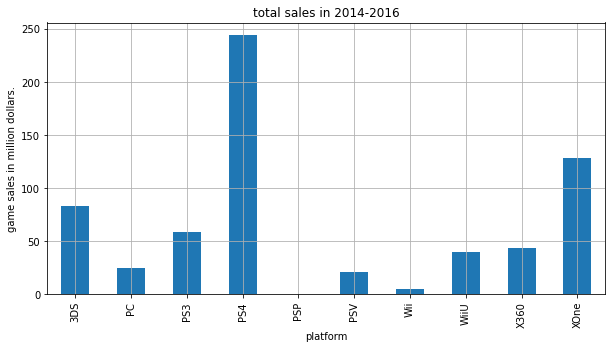

In [33]:
# estimate how many games were sold in total on all relevant platforms for the current period
actual_games_df.groupby(by='platform')['total_sales'].sum().plot(kind='bar', title='total sales in 2014-2016', grid=True, figsize=(10,5));
plt.ylabel('game sales in million dollars.')
plt.xlabel('platform');

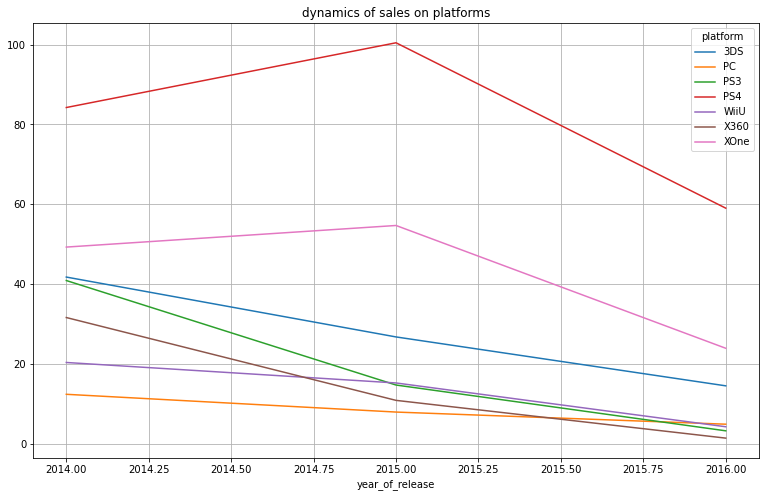

In [34]:
# look at the dynamics of sales on platforms with total sales above $50 million
top_platform = ['3DS', 'PC', 'WiiU', 'X360', 'XOne', 'PS3', 'PS4']
actual_games_df.query('platform in @top_platform').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    figsize=(13,8), grid=True)
plt.title('dynamics of sales on platforms');

All platforms at the time of 2016 are at the stage of declining sales.
At the same time, it is clear that the XBox360, PS3, WiiU are at the very last stage of the life cycle.

<b>PS4, Xbox One and Nintendo 3DS</b>, despite a clear decline in game sales, in 2017 have not yet reached the bottom peak of sales, and personal computers will probably never reach it, since this platform has the potential for constant technical and software upgrades.

Therefore, for further work, we can analyze only 4 dedicated platforms


In [35]:
actual_games_df = actual_games_df.loc[(actual_games_df['platform'] =='PS4')
                                      | (actual_games_df['platform'] =='XOne')
                                      | (actual_games_df['platform'] =='PC')
                                      | (actual_games_df['platform'] =='3DS')]

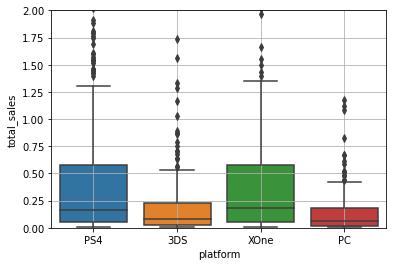

In [36]:
sns.boxplot(y=actual_games_df['total_sales'], x=actual_games_df['platform'])
plt.ylim(0,2)
plt.grid()

The diagram shows that the median value for all platforms does not exceed 0.25 million copies. The smallest median value in terms of the number of copies sold is observed on the PC platform, on this platform in relation to the rest - the quartile values and interquartile ranges are lower.

This is due to the fact that a fairly large number of niche indie projects are released on PC, which are sold in small volumes, while in relation to other platforms, indie projects are released significantly less. Sales over 0.5 million copies can be considered outliers

The PS4 and Xbox platforms have comparable values for both medians and quartiles, which can be explained by the fact that the consoles are direct competitors to each other and follow similar pricing and marketing policies. Sales of over 1.5 million copies can be considered outliers.

Statistical indicators for the 3DS platform are lower than those of other consoles, the third quartile is less than that of the other two consoles by 2 times. Sales of over 0.75 million copies can be considered outliers.


<b>An assessment of how sales within one popular platform are influenced by user and critic reviews.


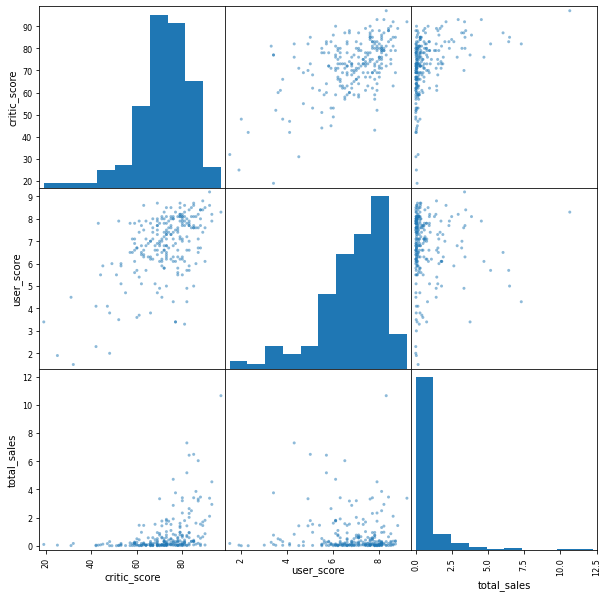

In [37]:
# build a scatter matrix for the PS4 platform
pd.plotting.scatter_matrix(actual_games_df
                           .loc[(actual_games_df['platform'] == 'PS4'),
                                ['critic_score', 'user_score','total_sales']], figsize=(10,10));

In [38]:
(actual_games_df.loc[(actual_games_df['platform'] == 'PS4')
                     ,['critic_score', 'user_score','total_sales']].corr())

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402120
user_score,0.546434,1.000000,-0.039364
total_sales,0.402120,-0.039364,1.000000


The impact of ratings on sales can be considered insignificant. The correlation coefficient of expert ratings and sales for the PS4 console is 0.4. It can be concluded that there is a weak correlation, but in addition to expert assessments, many other, more significant factors affect sales figures (marketing, franchise recognition, cost per copy, etc.)

There is no correlation between user ratings and sales. There is a hypothesis that users on the Internet are more active in leaving negative reviews for a product they did not like than positive reviews for a product they like.Experts attribute this to a special structure of human psychology and a more vivid experience of negative emotions than positive ones. 

At the same time, the scatter plots show that the vast majority of successful games with sales above 2 million copies have an expert rating of more than 80 points out of 100. For a user rating, the distribution looks less systematic and more chaotic.



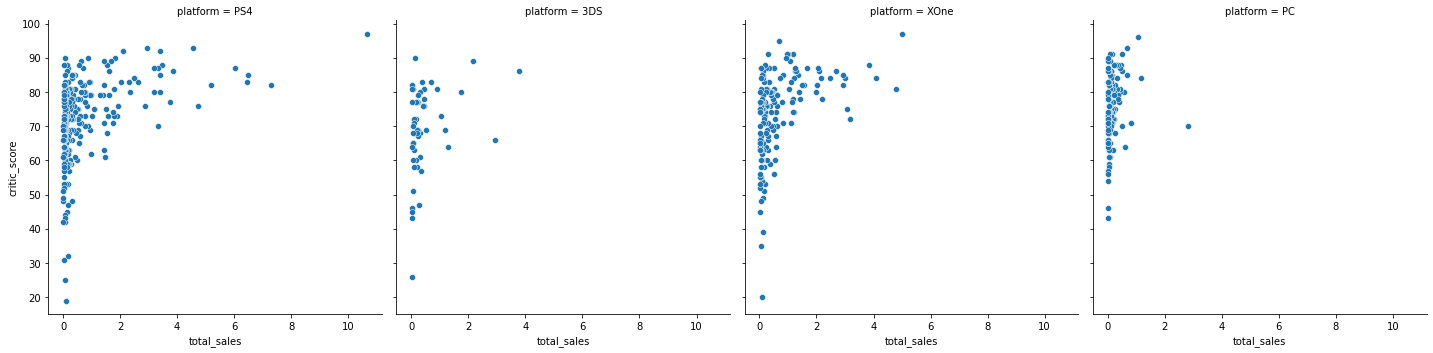

In [39]:
sns.relplot(data=actual_games_df, x='total_sales', y='critic_score', col='platform',kind='scatter');

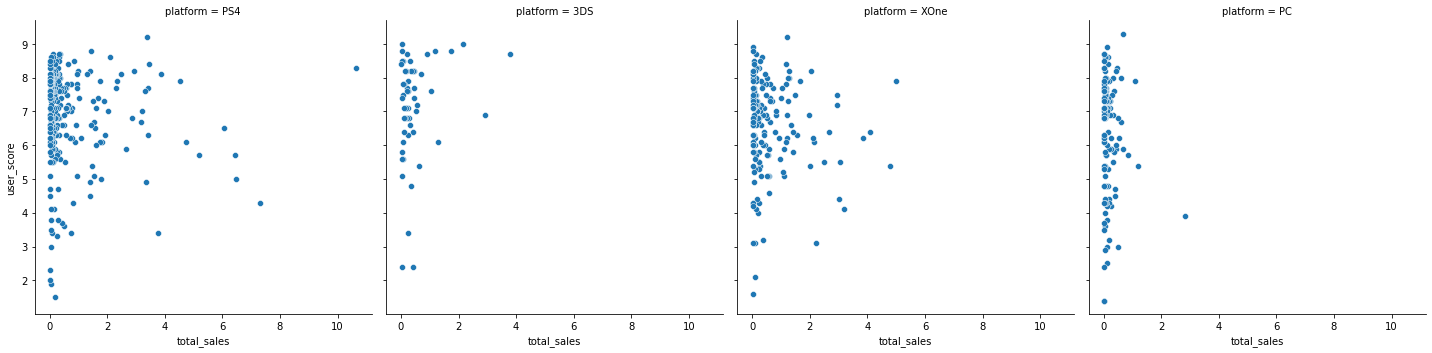

In [40]:
sns.relplot(data=actual_games_df, x='total_sales', y='user_score', col='platform',kind='scatter');

In [41]:
actual_games_df.groupby('platform')[['total_sales','critic_score','user_score']].corr()

total_sales  critic_score  user_score
platform                                                    
3DS      total_sales      1.000000      0.311752    0.214616
         critic_score     0.311752      1.000000    0.862485
         user_score       0.214616      0.862485    1.000000
PC       total_sales      1.000000      0.173823   -0.071152
         critic_score     0.173823      1.000000    0.466099
         user_score      -0.071152      0.466099    1.000000
PS4      total_sales      1.000000      0.402120   -0.039364
         critic_score     0.402120      1.000000    0.546434
         user_score      -0.039364      0.546434    1.000000
XOne     total_sales      1.000000      0.428650   -0.070393
         critic_score     0.428650      1.000000    0.440977
         user_score      -0.070393      0.440977    1.000000

Assessing the dependence of ratings on sales for all relevant platforms, it can be seen that games with high sales are more characterized by high ratings from critics and users.
- The strongest dependence of sales on critics' ratings is seen in the PS4 and XOne categories. The scatter matrix shows that games that have sold more than 2 million copies have critic scores of 70 or higher. The correlation coefficient of all sales for these platforms is 0.4
- User ratings cannot actually be used to analyze sales volume. In most platforms, the coefficient is insignificant and negative (from -0.12 to -0.03). Only for 3DS the coefficient is positive, while it is still negligible (0.2).

<b> Therefore, when predicting sales performance, it is better to rely on the ratings from critics than users. Especially for consoles.

Determination of the most profitable genres. Identification of genres with high and low sales

To assess the situation, it is necessary to evaluate
- the most popular genres released for selected platforms
- genres of games that generated the highest sales figures
- the genre with the highest average revenue

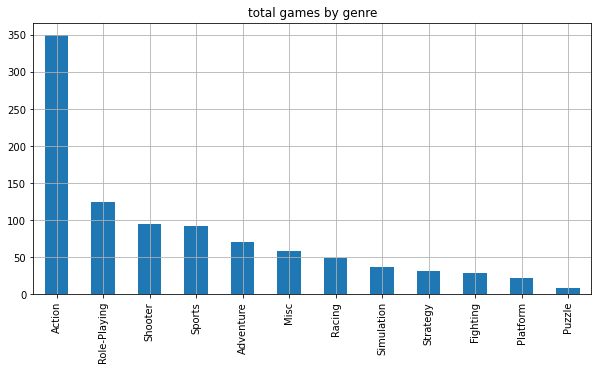

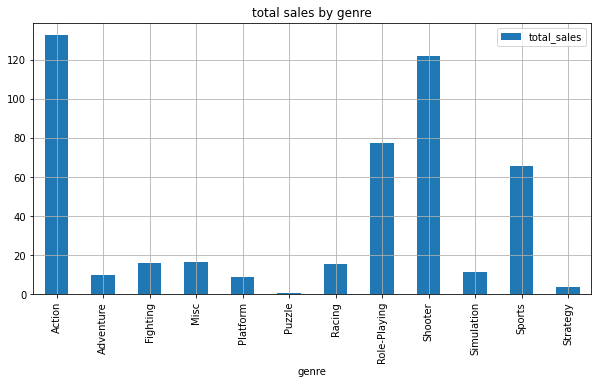

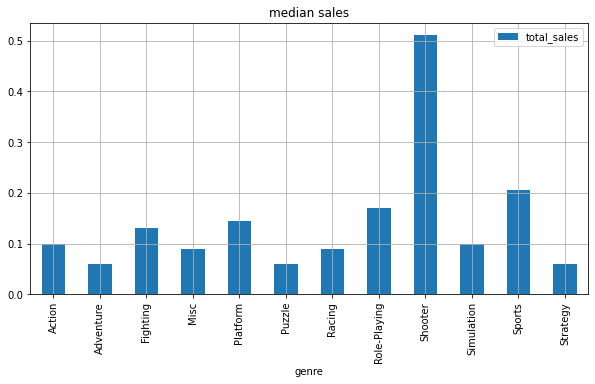

In [42]:
actual_games_df['genre'].value_counts().plot(kind='bar',figsize=(10,5),grid=True);
plt.title('total games by genre');
plt.show()
actual_games_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5),grid=True)
plt.title('total sales by genre');
plt.show()
actual_games_df.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(kind='bar', figsize=(10,5),grid=True,)
plt.title('median sales');
plt.show()

It can be concluded that the best-selling games of the Action, RPG, Shooter, Sports.

The most popular genre released is Action, and the Shooter genre has the highest average sales figures.

In other words, for the store, the indicators of total sales are important, according to which it is possible to assume which games will sell the most, and for developers, it is rather the median sales that will show which genre sells best on average

# Шаг 4. Portrait of the user of each region
- Definition for the user of each region (NA, EU, JP):
    - Most popular platforms (top 5), differences in sales shares.
    - The most popular genres (top 5).
    - The impact of the ESRB rating on sales in a particular region

In the previous step, we analyzed only those platforms that in 2017 have not yet reached the bottom peak of sales, but to select the top 5 platforms and genres for users of each region, we will take all the platforms on which games were sold from 2012 to 2016

In [43]:
games__after2012_df = games_df.query('year_of_release >= 2012')

In [44]:
# create a pivot table with sales figures by region
sales_by_region_part = (games__after2012_df
                        .pivot_table(index='platform', values = ['jp_sales', 'na_sales','eu_sales'], aggfunc='sum'))
sales_by_region_part.reset_index(inplace=True)
# add to the table columns of percentages of sales for each platform from total sales
sales_by_region_part['jp_%'] = ((sales_by_region_part['jp_sales'] / games__after2012_df['jp_sales'].sum())*100).round(1)
sales_by_region_part['na_%'] = ((sales_by_region_part['na_sales'] / games__after2012_df['na_sales'].sum())*100).round(1)
sales_by_region_part['eu_%'] = ((sales_by_region_part['eu_sales'] / games__after2012_df['eu_sales'].sum())*100).round(1)


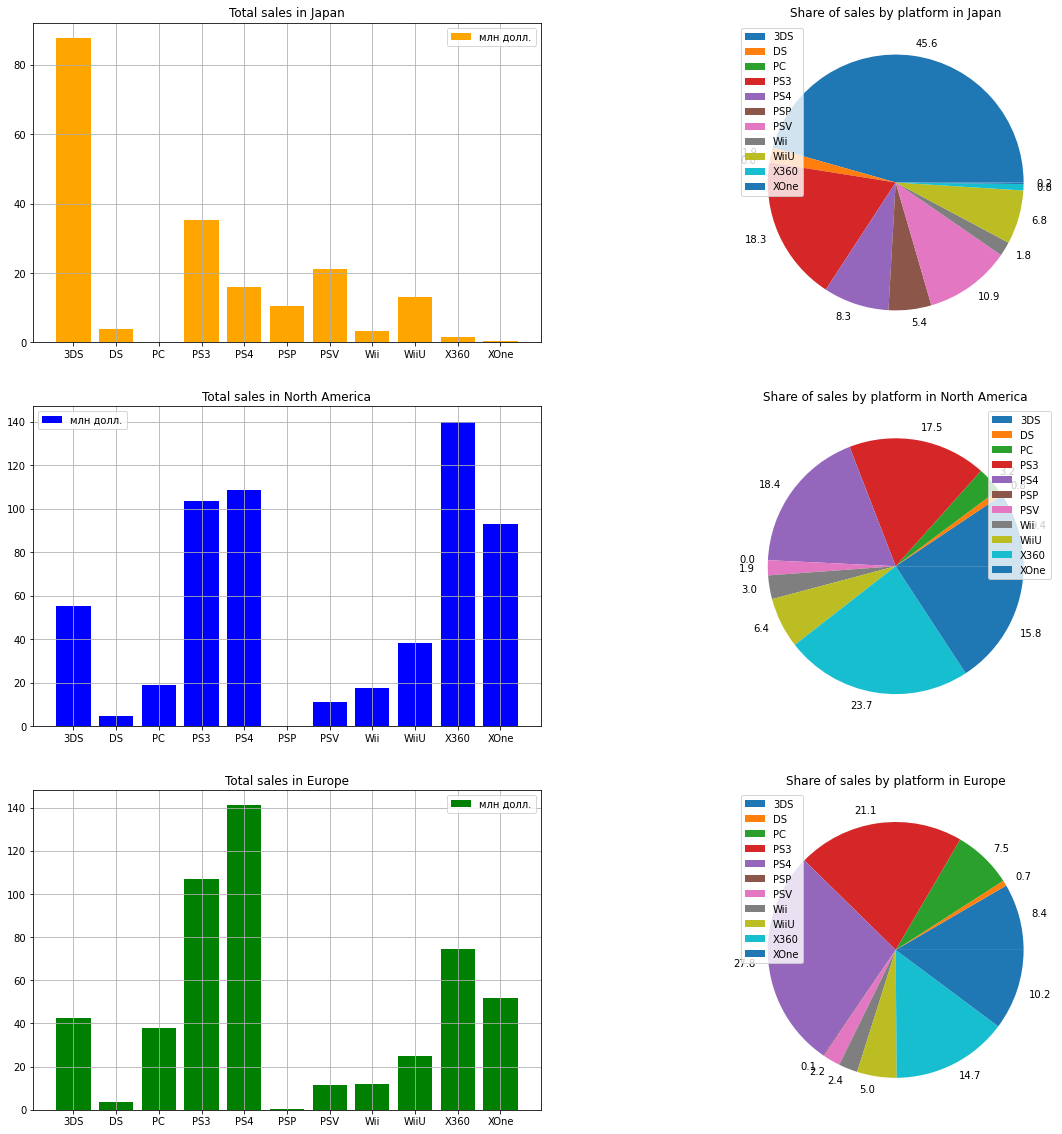

In [45]:
# build graphs with total sales and sales shares for each region
fig = plt.figure(figsize=(20,20))
ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)
ax_5 = fig.add_subplot(3, 2, 5)
ax_6 = fig.add_subplot(3, 2, 6)

ax_1.bar(sales_by_region_part['platform'], sales_by_region_part['jp_sales'], color = 'orange', label='млн долл.')
ax_1.set(title = 'Total sales in Japan')
ax_1.grid()
ax_1.legend()

ax_2.pie(sales_by_region_part['jp_%'], labels=sales_by_region_part['jp_%'],)
ax_2.set(title = 'Share of sales by platform in Japan')
ax_2.legend(sales_by_region_part['platform'])

ax_3.bar(sales_by_region_part['platform'], sales_by_region_part['na_sales'], color = 'blue', label='млн долл.')
ax_3.set(title = 'Total sales in North America')
ax_3.grid()
ax_3.legend()

ax_4.pie(sales_by_region_part['na_%'], labels=sales_by_region_part['na_%'],)
ax_4.set(title = 'Share of sales by platform in North America')
ax_4.legend(sales_by_region_part['platform'])

ax_5.bar(sales_by_region_part['platform'], sales_by_region_part['eu_sales'], color = 'green', label='млн долл.')
ax_5.set(title = 'Total sales in Europe')
ax_5.grid()
ax_5.legend()

ax_6.pie(sales_by_region_part['eu_%'], labels=sales_by_region_part['eu_%'])
ax_6.set(title = 'Share of sales by platform in Europe')
ax_6.legend(sales_by_region_part['platform'])

In [46]:
# it is expected that the absolute sales figures correspond to the relative ones.
# Therefore, to find the top 5 platforms, we use relative indicators

print('Top 5 platform by region')
print()
for i in sales_by_region_part[['jp_%', 'na_%', 'eu_%']]:

    dict_top_platform = {'jp_%':'Top 5 platform in Japan', 'na_%': 'Top 5 platform in North America', 'eu_%': 'Top 5 platform in Europe'}
    print(dict_top_platform[i])
    print(sales_by_region_part.sort_values(by=i, ascending=False)[['platform', i]].head())
    print()

Top 5 platform by region

Top 5 platform in Japan
  platform  jp_%
0      3DS  45.6
3      PS3  18.3
6      PSV  10.9
4      PS4   8.3
8     WiiU   6.8

Top 5 platform in North America
   platform  na_%
9      X360  23.7
4       PS4  18.4
3       PS3  17.5
10     XOne  15.8
0       3DS   9.4

Top 5 platform in Europe
   platform  eu_%
4       PS4  27.8
3       PS3  21.1
9      X360  14.7
10     XOne  10.2
0       3DS   8.4



Based on the results of the analysis, it can be seen that the preferences of residents of Europe and America are generally similar, and the same platforms made it to the top 5, while the platforms of the local market are more popular among residents of Japan.

The Nintendo 3DS is in first place, while in other regions it is in fifth place. It is noteworthy that another console from Nintendo - WiiU - got into the Top 5 platforms and not a single American console got into it.

Apply a similar approach to highlight the top 5 genres by region

In [47]:
# create a pivot table with sales figures by region
sales_by_genre_part = (games__after2012_df
                       .pivot_table(index='genre', values = ['jp_sales', 'na_sales','eu_sales'], aggfunc='sum'))
sales_by_genre_part.reset_index(inplace=True)
# add to the table columns of percentages of sales for each genre of total sales
sales_by_genre_part['jp_%'] = ((sales_by_genre_part['jp_sales'] / games__after2012_df['jp_sales'].sum())*100).round(1)
sales_by_genre_part['na_%'] = ((sales_by_genre_part['na_sales'] / games__after2012_df['na_sales'].sum())*100).round(1)
sales_by_genre_part['eu_%'] = ((sales_by_genre_part['eu_sales'] / games__after2012_df['eu_sales'].sum())*100).round(1)


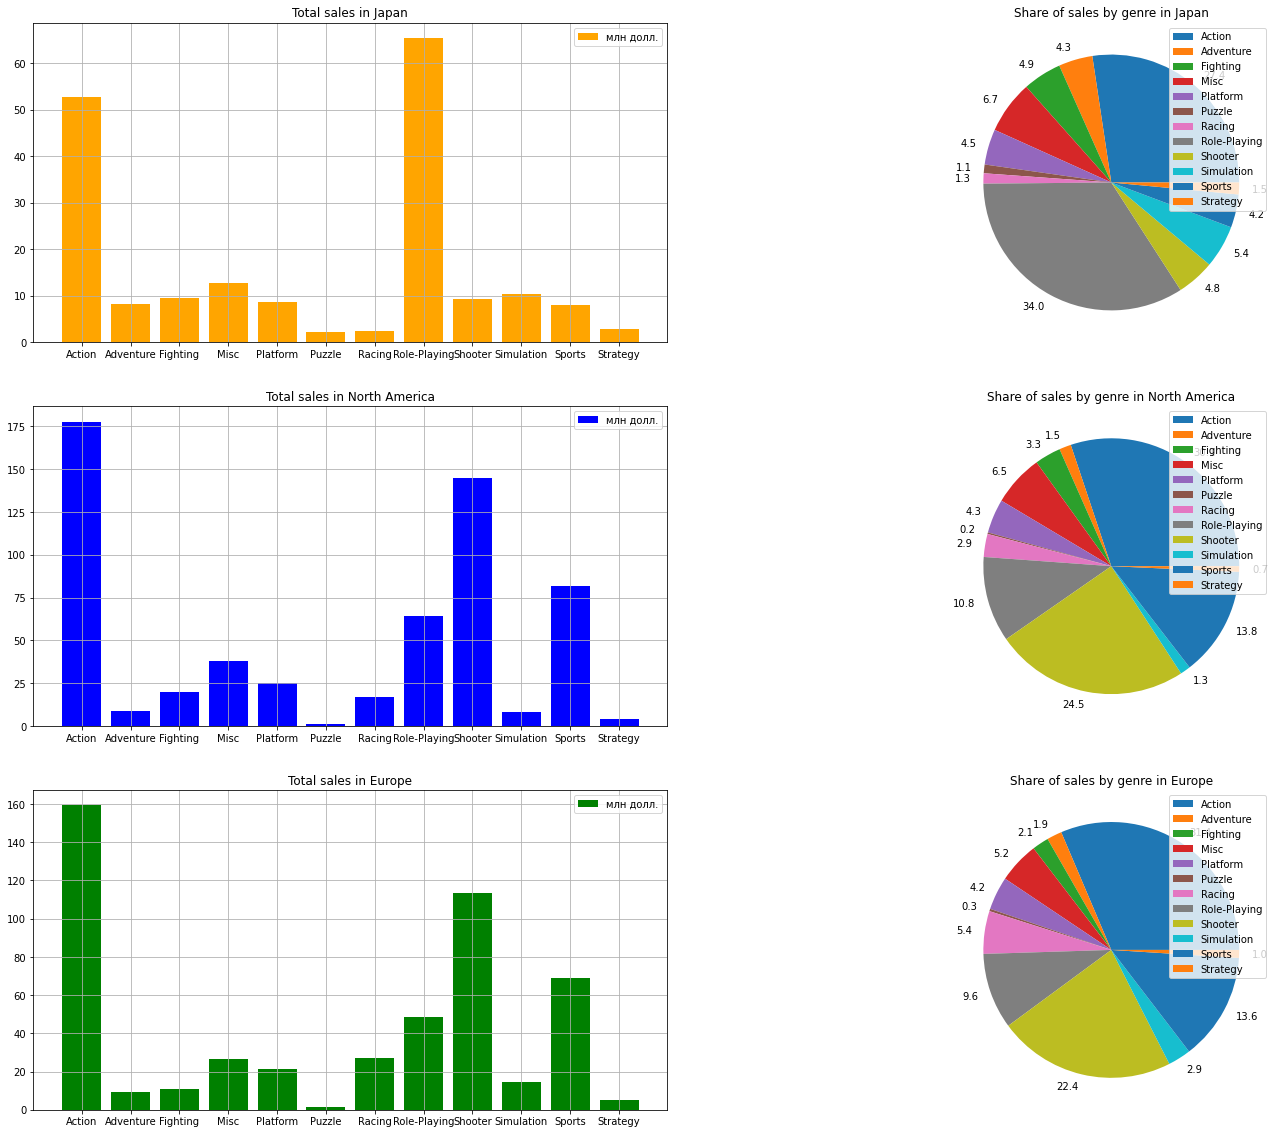

In [48]:
# build graphs with total sales and sales shares for each region
fig = plt.figure(figsize=(25,20))
ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)
ax_5 = fig.add_subplot(3, 2, 5)
ax_6 = fig.add_subplot(3, 2, 6)

ax_1.bar(sales_by_genre_part['genre'], sales_by_genre_part['jp_sales'], color = 'orange', label='млн долл.')
ax_1.set(title = 'Total sales in Japan')
ax_1.grid()
ax_1.legend()

ax_2.pie(sales_by_genre_part['jp_%'], labels=sales_by_genre_part['jp_%'],)
ax_2.set(title = 'Share of sales by genre in Japan')
ax_2.legend(sales_by_genre_part['genre'])

ax_3.bar(sales_by_genre_part['genre'], sales_by_genre_part['na_sales'], color = 'blue', label='млн долл.')
ax_3.set(title = 'Total sales in North America')
ax_3.grid()
ax_3.legend()

ax_4.pie(sales_by_genre_part['na_%'], labels=sales_by_genre_part['na_%'],)
ax_4.set(title = 'Share of sales by genre in North America')
ax_4.legend(sales_by_genre_part['genre'])

ax_5.bar(sales_by_genre_part['genre'], sales_by_genre_part['eu_sales'], color = 'green', label='млн долл.')
ax_5.set(title = 'Total sales in Europe')
ax_5.grid()
ax_5.legend()

ax_6.pie(sales_by_genre_part['eu_%'], labels=sales_by_genre_part['eu_%'])
ax_6.set(title = 'Share of sales by genre in Europe')
ax_6.legend(sales_by_genre_part['genre'])

In [49]:
print('Тоp-5 genres by region')
print()
for i in sales_by_genre_part[['jp_%', 'na_%', 'eu_%']]:
    dict_top_genre = {'jp_%':'Тоp-5 genres in Japan', 'na_%': 'Top-5 genres in North America', 'eu_%': 'Тоp-5 genres in Europe'}
    print(dict_top_genre[i])
    print(sales_by_genre_part.sort_values(by=i, ascending=False)[['genre', i]].head())
    print()

Тоp-5 genres by region

Тоp-5 genres in Japan
          genre  jp_%
7  Role-Playing  34.0
0        Action  27.4
3          Misc   6.7
9    Simulation   5.4
2      Fighting   4.9

Top-5 genres in North America
           genre  na_%
0         Action  30.1
8        Shooter  24.5
10        Sports  13.8
7   Role-Playing  10.8
3           Misc   6.5

Тоp-5 genres in Europe
           genre  eu_%
0         Action  31.4
8        Shooter  22.4
10        Sports  13.6
7   Role-Playing   9.6
6         Racing   5.4



Action games show strong sales in all three regions. For Europe and America, shooters and sports games are also successful, while in Japan, role-playing games have the highest sales.

In [50]:
# Does the ESRB rating affect sales in a particular region
esrb_pivot = games__after2012_df.pivot_table(index='rating', values=['na_sales','eu_sales', 'jp_sales'], aggfunc=
['sum'])

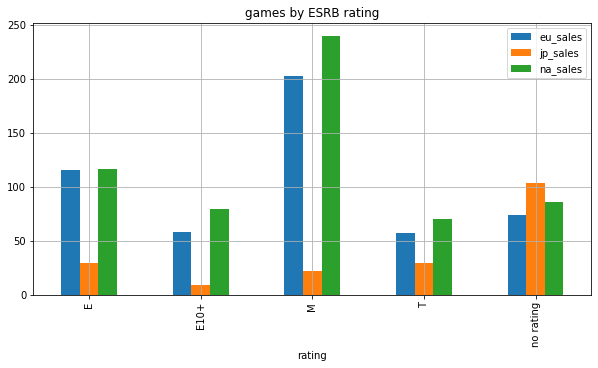

In [51]:
esrb_pivot.plot(y='sum', kind='bar', grid=True, figsize=(10,5))
plt.title('games by ESRB rating');

In Europe and America, M (adult) rated games have the most sales. Games for teenagers (E10+ and T) are the least sold. In Japan, most of the games sold have no rating at all. The figures are about the same, except for E10+ (games with this rating sell the worst in Japan).

# Hypothesis testing
- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres Action and Sports are different.


To test hypotheses using the Student's test, we need to bring the distribution as close as possible to normal.
To do this, we will find outliers for the estimates of PC and XBox users

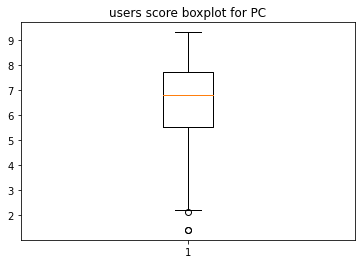

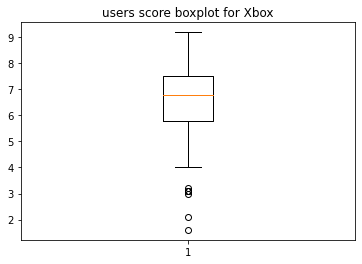

In [52]:
plt.boxplot(games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True) 
                                    & (games__after2012_df['platform'] =='PC'),'user_score'])
plt.title('users score boxplot for PC');
plt.show()
plt.boxplot(games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True) 
                                    & (games__after2012_df['platform'] =='XOne'),'user_score'])
plt.title('users score boxplot for Xbox');
plt.show()

For PC users, scores below 2.5 are considered outliers, and for X-Box users, scores below 4 are considered outliers. Let's get rid of outliers and build histograms:

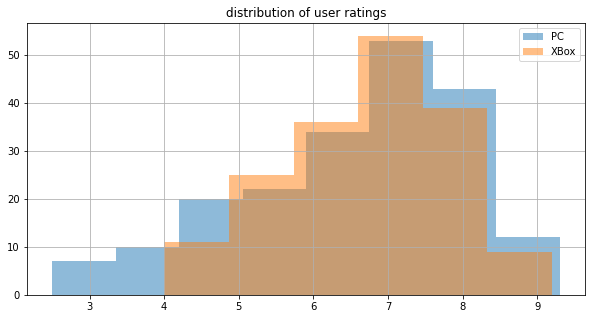

In [53]:
(games__after2012_df.loc[(games__after2012_df['platform']=='PC')
                         & (games__after2012_df['user_score'] >=2.5),'user_score'].hist(bins=8, alpha=0.5, label='PC', figsize=(10,5))) 

(games__after2012_df.loc[(games__after2012_df['platform']=='XOne')
                         & (games__after2012_df['user_score'] >=4),'user_score'].hist(bins=6, alpha=0.5, label='XBox')) 

plt.title('distribution of user ratings')
plt.legend()
plt.show()

The histograms show that the distribution tends to be normal, but it is not. The number of observations is more than 30 in each of the groups. We apply the Student's test to check the equality of the means of the two populations (PC Users and XBox Users), given that the values are not normally distributed, we will set the alpha criterion at 0.05, increasing the level of acceptability of values

Formulating a hypothesis:
- H0: The average user ratings of the Xbox One and PC platforms are the same
- H1: The average user ratings of the Xbox One and PC platforms are different

In [54]:
pc_array = (games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True)
                                    & (games__after2012_df['platform'] =='PC')
                                    & (games__after2012_df['user_score'] >= 2.5),'user_score'].values)
xone_array = (games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True)
                                      & (games__after2012_df['platform'] =='XOne')
                                      & (games__after2012_df['user_score'] >= 4),'user_score'].values)
alpha = 0.05
results = st.ttest_ind(pc_array, xone_array)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Unable to reject null hypothesis")

p-value: 0.28106094476578763
Unable to reject null hypothesis


repeat the steps for two groups of values: action and shooter ratings. Remove outliers, build distribution graphs, apply t- test for two populations

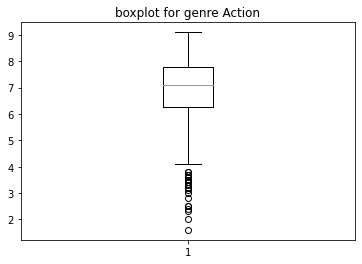

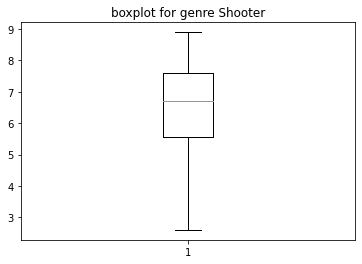

In [55]:
plt.boxplot(games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True)
                                    & (games__after2012_df['genre'] =='Action'),'user_score'])
plt.title('boxplot for genre Action');
plt.show()
plt.boxplot(games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True)
                                    & (games__after2012_df['genre'] =='Shooter'),'user_score'])
plt.title('boxplot for genre Shooter');
plt.show()

The diagrams show that action games are characterized by high scores, and anything below 4 points is considered outliers. Shooter scores are distributed over the entire range from 1 to 10 with no outliers. Therefore, we need to get rid of outliers in only one group indicators

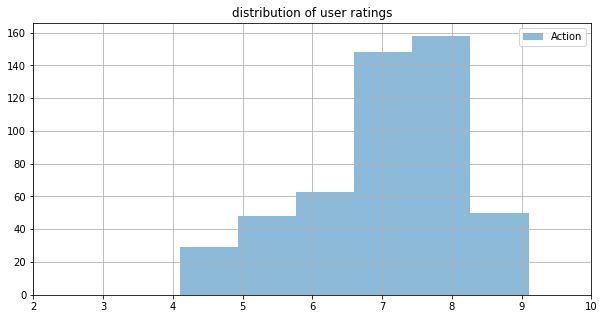

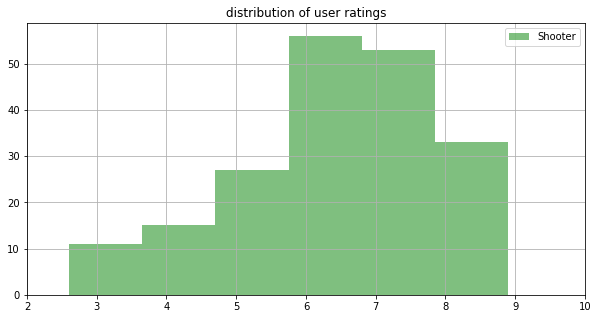

In [56]:
(games__after2012_df.loc[(games__after2012_df['genre']=='Action')
                         & (games__after2012_df['user_score'] >=4)
                         ,'user_score'].hist(bins=6, alpha=0.5, label='Action', figsize=(10,5)))
plt.title('distribution of user ratings')
plt.xlim(2,10)
plt.legend()
plt.show()
(games__after2012_df.loc[(games__after2012_df['genre']=='Shooter')
                         ,'user_score'].hist(bins=6, alpha=0.5, label='Shooter', figsize=(10,5), color='green'))
plt.title('distribution of user ratings')
plt.xlim(2,10)
plt.legend()
plt.show()

The histograms show that the distribution is not normal. The number of observations is more than 30 in each of the groups. We apply the Student's test to check the equality of the means of the two populations (PC users and XBox users), given that the values are not normally distributed, we will set the alpha criterion at 0.05, increasing the level of acceptability of values

Formulating a hypothesis:
- H0: The average user ratings of the Action and Sports genres are equal.
- H1: The average user ratings of the Action and Sports genres are different.

In [57]:
action_array= (games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True)
                                       & (games__after2012_df['genre'] =='Action')
                                       & (games__after2012_df['user_score'] >=4)
                                       ,'user_score'].values)
shooter_array= (games__after2012_df.loc[(games__after2012_df['user_score'].isnull() !=True)
                                        & (games__after2012_df['genre'] =='Shooter')
                                        ,'user_score'].values)
result2= st.ttest_ind(action_array,shooter_array)
print('р-value =', result2.pvalue )
if result2.pvalue < 0.05:
    print('Rejecting the null hypothesis')
else:
    print('Unable to reject null hypothesis')

р-value = 1.1153278687347047e-08
Rejecting the null hypothesis


The p-value is less than the statisitic significance level, and therefore we reject the hypothesis that the ratings of the two genres are equal.
Based on the indicators of our sample, we can assume that the average ratings of the two genres differ

# General conclusion


1. The period of the life cycle of the platform is determined as 10-11 years. The cut is made according to the data after 2012. Post-2012 data identifies profitable platforms: PS4, XOne, PC, 3DS.


2. For the PS4 platform and all profitable platforms, the correlation between user ratings, peer reviews, and sales figures is calculated. it was found that there is an small correlation between sales and expert ratings, and there is no correlation between sales and user ratings. At the same time, the scatterplots show that games with sales above 2 million USD are more characterized by high expert ratings.


3. Estimated sales of games by genre. Best-selling Action, RPG, Shooter, Sports games. The most popular released genre is Action, the games of this genre are the most represented in our sample. At the same time, the Shooter genre has the highest average sales values. 


4. Defined a portrait of users in three regions: Japan, North America and Europe.
Preferences for platforms among residents of America and Europe are generally similar. Top5. platforms are the same: PS4, PS3, XBox 360, XBoxOne, 3DS. At the same time, in America, the leading position is occupied by the console from Microsoft XBox 360, and in Europe - by Sony PS4.The least popular among the top 5 for both regions was the Nintendo 3DS.Japan's preferences differ markedly from other regions.In the first place is the 3DS platform, among the top 5 there is Nintendo WiiU, which is not among the leaders of consoles in other regions.At the same time, the entire top five in Japan is occupied by locally produced platforms.There is not one American.The most popular genre among the inhabitants of Europe and America is Action. In Japan, it is in second place and inferior to role-playing games. In general, the first 4 of the 5 most popular genres in Europe and America are completely the same. These are Action, Shooter, Sport, RPG genres. In Japan, sports games and shooters are not popular, but fighting games and simulations made it into the top 5.


5. For the European and American markets, the absolute leaders in sales are games with an M rating, while in Japan, apparently, the ESRB rating does not affect sales much.


6. Using the Student's test, two hypotheses of the equality of means for two general populations were tested. The test results showed that the hypothesis that the average user ratings of the Xbox One and PC platforms are the same could not be rejected, the hypothesis that the average user ratings of the Action and Sports genres are equal was rejected.

# Recommendations for the store :
1. If we predict potentially successful products for 2017, then based on the analysis, we can assume that for the Americas and Europe, we should bet on the sale of action games, shooters, sports simulators and RPGs for the Xbox One and PS4 platforms.
You can no longer count on the Xbox 360 and PS3, judging by the graphs, their life cycle by 2017 has come to an end. M-rated games will probably outsell games for younger audiences.

2. For the Japanese market, it is better to focus on 3DS, PS4, WiiU platforms. Of the genres, preference should be given to RPG and Action. You can ignore the ESRB ratings.

3. At the same time, regardless of the region, it would be useful to evaluate expert ratings, but you can not pay special attention to user ratings